# Project: Investigate a Dataset (TMDB movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue 

### Questions to answer

<li>What are the top 10 movies in terms of revenues in all years?</li>
<li>In which year, the highest number of movies were released? show to top 10</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>

In [1]:
# import pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data

movies = pd.read_csv('tmdb-movies.csv')
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Number of rows and columns in the movies dataframe
movies.shape

(10866, 21)

In [4]:
# check  datatype, null value and name of each column. 
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# check if there are any duplicates rows in the movies dataframe
movies.duplicated().sum()

1



### Data Cleaning

<li>Drop the hompage column since it has a lot of null values</li>
<li>Remove duplicates</li>

In [6]:
movies.drop(['homepage'], axis=1, inplace= True)
movies.drop_duplicates(inplace=True)
movies.shape

(10865, 20)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='one'></a>
### Research Question 1: What are the top 10 movies in terms of revenues in all years

Text(0.5,1,'Top 10 movies with highest revenues')

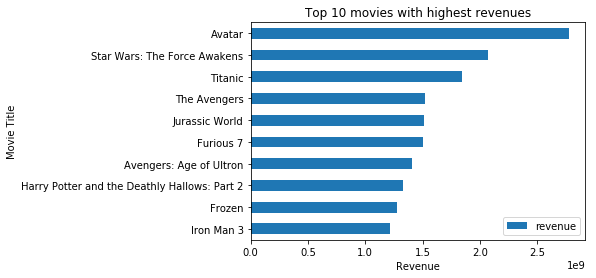

In [7]:
top_10_movies = movies.sort_values(by='revenue', ascending=False).head(10).loc[:, ['original_title', 'revenue']]
top_10_movies.sort_values(by='revenue', ascending=True).plot(kind='barh', x='original_title')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.title('Top 10 movies with highest revenues')

### Research Question 2: In which year, the highest number of movies were released? show to top 10

Text(0.5,0,'Release Year')

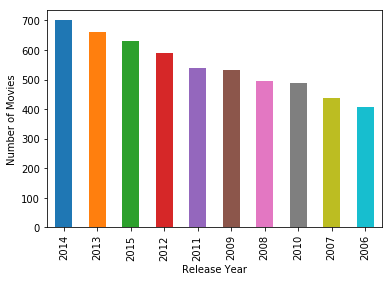

In [8]:

movies.groupby('release_year')['id'].count().sort_values( ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of Movies')
plt.xlabel('Release Year')




### Research Question 3: What kinds of properties are associated with movies that have high revenues?


#### Relationship between revenue and budget

In [9]:
# create two masks, one for high revenue movies and the other for low revenue movies

high_rev = movies.revenue >= movies.revenue.mean()
low_rev = movies.revenue < movies.revenue.mean()

Text(0.5,0,'Budget')

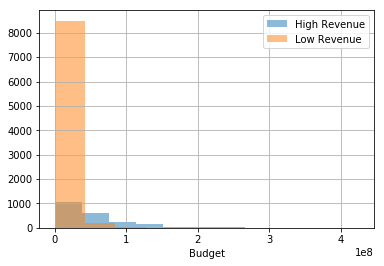

In [10]:
#Draw histogram that show the relation between budget and revenue 
movies.budget[high_rev].hist(label='High Revenue', alpha=0.5)
movies.budget[low_rev].hist(label='Low Revenue', alpha=0.5)
plt.legend()
plt.xlabel('Budget')


#### Relationship between user voting and revenue 

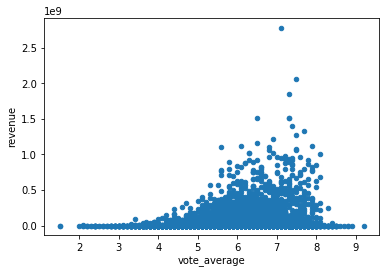

In [11]:
high_rev_movies = movies.sort_values(by='revenue', ascending=False)
high_rev_movies.plot(kind='scatter', x='vote_average', y='revenue');

<a id='conclusions'></a>
## Conclusions


<li>Avatar, Star Wars and Titanic are the movies with highest revenues in all years</li>
<li>The most number of movies were released in 2014 followed by 2013 then 2015</li>
<li>The higher the budget of the movie, the higher revenue the movie will make</li>
<li>Movies with higher user vote tend to be the movies with higher revenues</li>


In [12]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0